# Examples of noise added to the simulations

This is a copy of the super basic token economy, used to demonstrate the noise add-ons.

In [1]:
import numpy as np
import scipy
import sys
import os
tokenlab_path=os.path.abspath("").replace('notebooks','src')
sys.path.insert(0,tokenlab_path)

from TokenLab.simulationcomponents import *
from TokenLab.simulationcomponents.usergrowthclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.tokeneconomyclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.agentpoolclasses import *
from TokenLab.simulationcomponents.pricingclasses import *
from TokenLab.simulationcomponents.addons import AddOn_RandomNoise, AddOn_RandomNoiseProportional
from utils.helpers import *
from matplotlib import pyplot as plt

# Globals

We start by defining our globals. We choose 60 iterations, with each iteration representing 1 month, and an average holding time of 1 month. The total circulating supply is 100 million

In [2]:
ITERATIONS=60
HOLDING_TIME=1
SUPPLY=10**9
INITIAL_PRICE=0.1

# Increasing user growth without noise

Let's see what user growth looks like when we don't apply any noise add-ons.

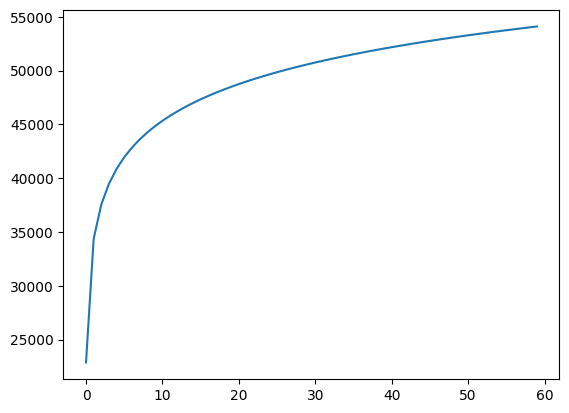

In [3]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space)


ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=100,currency='$')
plt.plot(usm_fiat._num_users_store)

This is what the price looks like below. The price growth is equivalent to user growth.

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 511.11it/s]


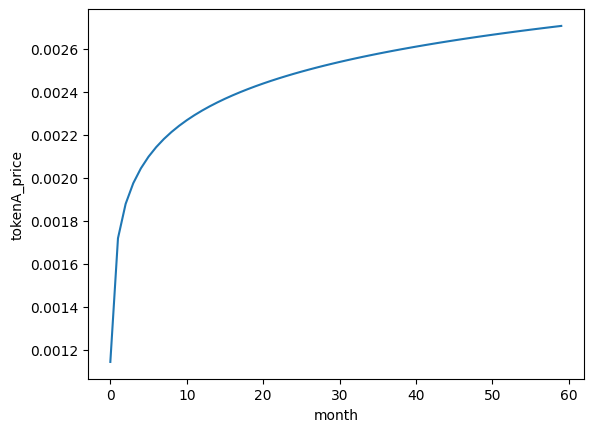

In [4]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)
te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

In [5]:
reps

,tokenA_price,transactions_$,num_users,iteration,holding_time,effective_holding_time,supply,transactions_tokenA,repetition_run,iteration_time
0,0.001143,2286400,22864,1,1,1.0,2000000000,2.286400e+07,0,0
1,0.001718,3436200,34362,2,1,1.0,2000000000,3.005773e+09,0,1
2,0.001878,3755300,37553,3,1,1.0,2000000000,2.185728e+09,0,2
3,0.001974,3947900,39479,4,1,1.0,2000000000,2.102575e+09,0,3
4,0.002043,4086300,40863,5,1,1.0,2000000000,2.070113e+09,0,4
...,...,...,...,...,...,...,...,...,...,...
55,0.002688,5375200,53752,56,1,1.0,2000000000,2.003392e+09,49,55
56,0.002692,5384100,53841,57,1,1.0,2000000000,2.003312e+09,49,56
57,0.002696,5392900,53929,58,1,1.0,2000000000,2.003269e+09,49,57
58,0.002701,5401500,54015,59,1,1.0,2000000000,2.003189e+09,49,58


# Increasing user growth with noise

Now let's apply some noise to the user growth. We see that the price now takes a more realistic trajectory.

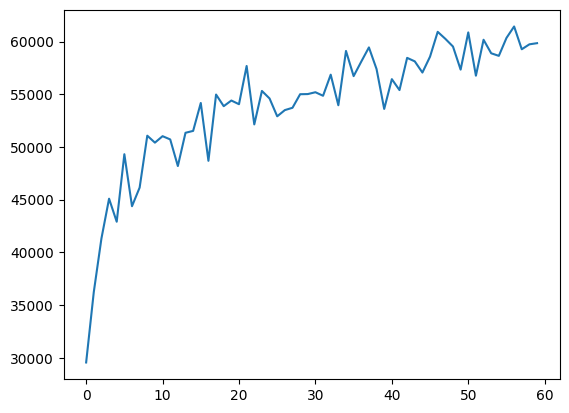

In [6]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space,
                           noise_addon=AddOn_RandomNoise(dist_params={'loc':5000,'scale':2000}))


ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=10,currency='$')
plt.plot(usm_fiat._num_users_store)

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 83.79it/s]


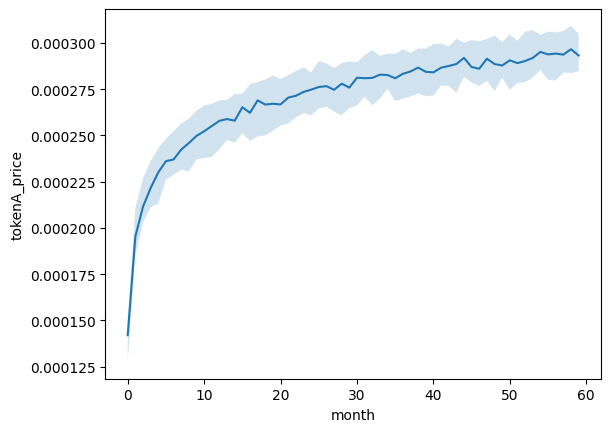

In [7]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)
te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

# Increasing user growth with adaptive noise

Now let's apply some proportional noise. The variance scales in accordance with user growth. In this example it is 10% of the total number of users. This is calculated upon the original user projections.

We see that the price varies more wildly compared to before.

Text(0.5, 0, 'month')

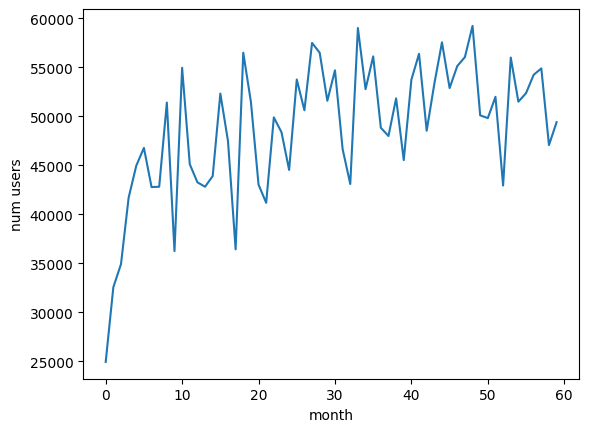

In [8]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space,
                           noise_addon=AddOn_RandomNoiseProportional(std_param=10))


ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')
plt.plot(usm_fiat._num_users_store)
plt.ylabel('num users')
plt.xlabel('month')

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 79.82it/s]


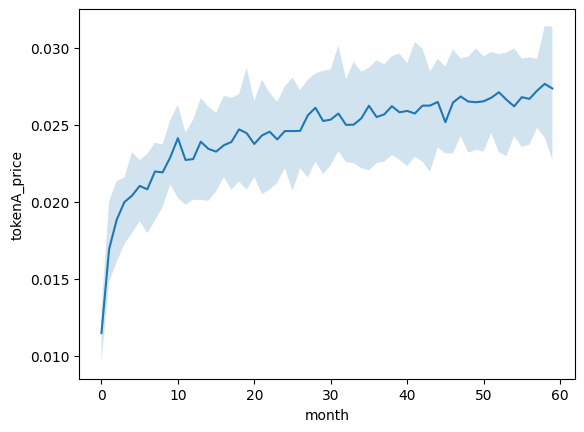

In [9]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)
te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

# User growth stochastic and and stochastic transactions

Now let's try to add everything all together! In this case we add the noise to user growth, while also used the stochastic transactions class. The stochastic transactions class does not accept any noise addons, because of the way it's designed, as it implements multiple stochastic components simultaneously.

In [10]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space,
                           noise_addon=AddOn_RandomNoiseProportional(std_param=10))

tsm_fiat=TransactionManagement_Stochastic(activity_probs=np.linspace(0.25,1,ITERATIONS),
                                            value_dist_parameters={'loc':1000,'scale':200},
                                           transactions_dist_parameters={'mu':1})

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=tsm_fiat,currency='$')

100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 21.90it/s]


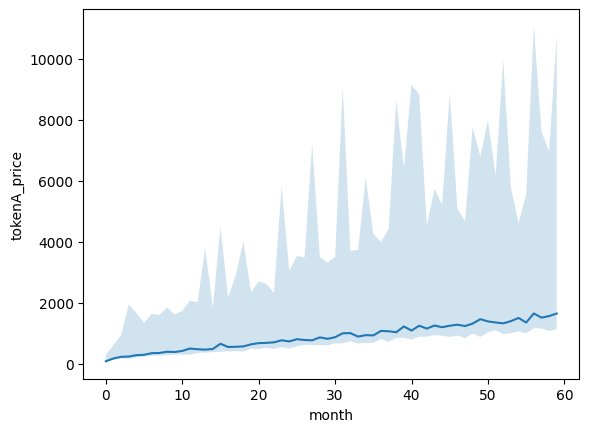

In [11]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)
te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

# User growth stochastic and linear transaction trend with noise component
Now let's try to add everything all together! In this case we add the noise to user growth, while also used the stochastic transactions class. The stochastic transactions class does not accept any noise addons, because of the way it's designed, as it implements multiple stochastic components simultaneously.

Text(0, 0.5, 'month')

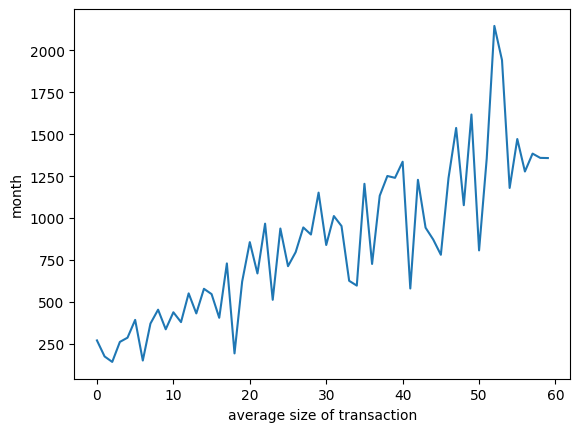

In [12]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space,
                           noise_addon=AddOn_RandomNoiseProportional(std_param=10))

tsm_fiat=TransactionManagement_Trend(average_transaction_initial=200,average_transaction_final=1500,
                                     noise_addon=AddOn_RandomNoiseProportional(std_param=4),num_steps=ITERATIONS)

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=tsm_fiat,currency='$')
plt.plot(tsm_fiat._transactions_means_store)
plt.xlabel('average size of transaction')
plt.ylabel('month')

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 41.17it/s]


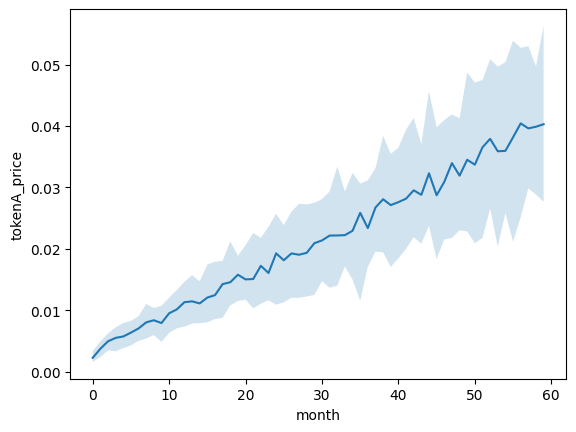

In [13]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)
te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

# Price plus noise

There are different pricing functions that we can use. Let's try replacing the normal pricing function, with one that adds Gaussian noise and let's see what happens.

100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 20.64it/s]


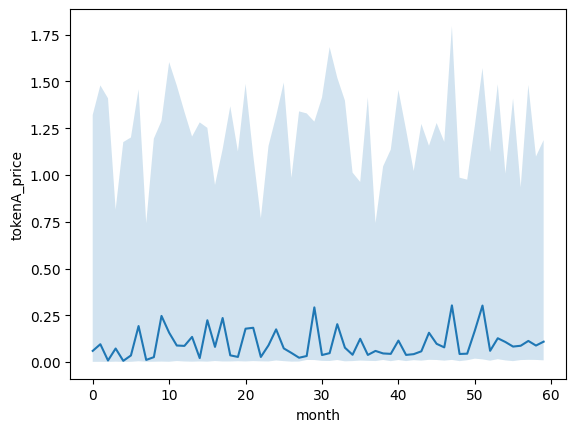

,tokenA_price,transactions_$,num_users,iteration,holding_time,effective_holding_time,supply,transactions_tokenA,repetition_run,iteration_time
0,1.065054,5.270575e+06,23887.720340,1,0.592049,404.150847,2000000000,5.270575e+07,0,0
1,0.006020,5.350845e+06,31268.935617,2,2.249995,2.249995,2000000000,5.024015e+06,0,1
2,0.001279,4.784798e+06,36970.993593,3,0.534541,0.534541,2000000000,7.948583e+08,0,2
3,0.392280,1.053057e+07,38873.730058,4,0.100000,74.503035,2000000000,8.234508e+09,0,3
4,0.006577,1.416124e+07,40616.579067,5,0.928834,0.928834,2000000000,3.609984e+07,0,4
...,...,...,...,...,...,...,...,...,...,...
55,0.018782,2.966344e+07,48820.834172,56,1.266361,1.266361,2000000000,6.317464e+09,49,55
56,0.022817,7.820075e+07,56108.067757,57,0.583541,0.583541,2000000000,4.163533e+09,49,56
57,0.051229,4.019754e+07,47895.751271,58,2.548848,2.548848,2000000000,1.761762e+09,49,57
58,0.035915,5.392437e+07,54392.208137,59,1.332049,1.332049,2000000000,1.052620e+09,49,58


In [14]:
te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,
                      price_function=PriceFunction_EOE,token='tokenA',
                      price_function_parameters={'noise_addon':AddOn_RandomNoise()},initial_price=INITIAL_PRICE)
te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot
reps

# Price plus noise plus adaptive variance

This is a special pricing mechanism which induces randomness in the price, but the variance of the noise is proportional to the price. The idea behind this is similar to https://www.investopedia.com/terms/g/garch.asp and has also been observed in the cryptocurrency markets. For example, this holds true for Bitcoin. The higher the value of bitcoin, the higher the observed volatility.

100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 22.46it/s]


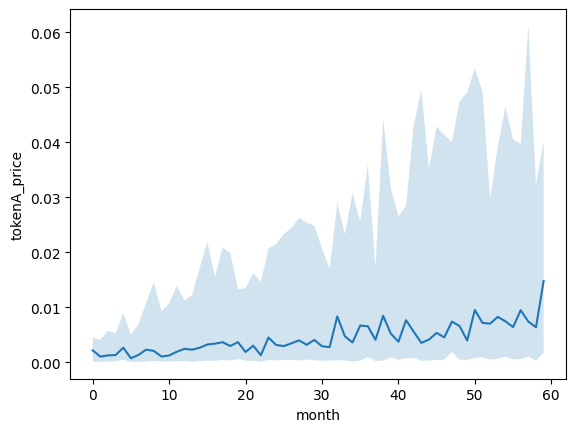

In [15]:
te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,
                      price_function=PriceFunction_EOE,token='tokenA',
                      price_function_parameters={'noise_addon':AddOn_RandomNoiseProportional(std_param=7)},
                      initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot